**Hierarchial Clustering**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('C:/JYOTHSNA COLLEGE/DATA SCIENCE/mall.csv')

In [4]:
data.shape

(200, 5)

In [5]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
x = data.iloc[:, [3, 4]].values
print(x.shape)

(200, 2)


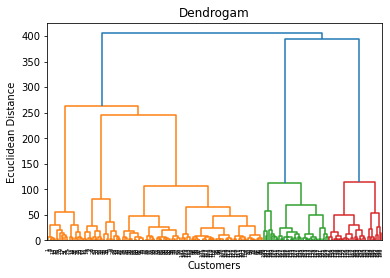

In [7]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam')
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

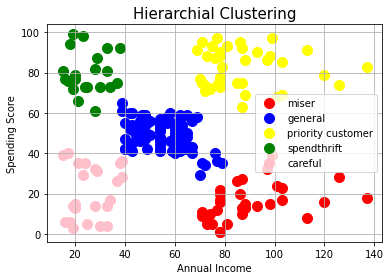

In [8]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = 'miser')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'general')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'yellow', label = 'priority customer')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'green', label = 'spendthrift')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'pink', label = 'careful')

plt.title('Hierarchial Clustering', fontsize = 15)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

**Text Analysis and Topic Modelling**

In [4]:
import pandas as pd
import os

In [5]:
papers  = pd.read_csv('C:/JYOTHSNA COLLEGE/DATA SCIENCE/papers.csv')

In [6]:
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [7]:
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)
papers.head()

,year,title,abstract,paper_text
5866,2016,The Parallel Knowledge Gradient Method for Bat...,In many applications of black-box optimization...,The Parallel Knowledge Gradient Method\nfor Ba...
4234,2012,Training sparse natural image models with a fa...,We present a new learning strategy based on an...,Training sparse natural image models with a fa...
6452,2017,SGD Learns the Conjugate Kernel Class of the N...,We show that the standard stochastic gradient ...,SGD Learns the Conjugate Kernel Class of the\n...
4710,2014,Fast Sampling-Based Inference in Balanced Neur...,Multiple lines of evidence support the notion ...,Fast Sampling-Based Inference in Balanced Neur...
5716,2016,Image Restoration Using Very Deep Convolutiona...,"In this paper, we propose a very deep fully co...",Image Restoration Using Very Deep Convolutiona...


In [8]:
import re

# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['paper_text_processed'].head()

5866    the parallel knowledge gradient method\nfor ba...
4234    training sparse natural image models with a fa...
6452    sgd learns the conjugate kernel class of the\n...
4710    fast sampling-based inference in balanced neur...
5716    image restoration using very deep convolutiona...
Name: paper_text_processed, dtype: object

In [9]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


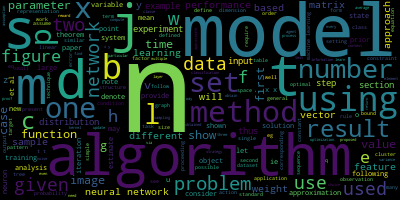

In [10]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="black", max_words=1000, contour_width=3, contour_color='yellow')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [11]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to C:\Users\Jyothsna V
[nltk_data]     Rao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['parallel', 'knowledge', 'gradient', 'method', 'batch', 'bayesian', 'optimization', 'jian', 'wu', 'peter', 'frazier', 'cornell', 'university', 'ithaca', 'ny', 'jw', 'pf', 'cornelledu', 'abstract', 'many', 'applications', 'black', 'box', 'optimization', 'one', 'evaluate', 'multiple', 'points', 'simultaneously', 'eg']


In [12]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 4), (7, 1), (8, 1), (9, 15), (10, 1), (11, 4), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 4), (19, 3), (20, 3), (21, 1), (22, 1), (23, 23), (24, 24), (25, 1), (26, 1), (27, 1), (28, 1), (29, 7)]


In [14]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.006*"algorithm" + 0.006*"learning" + 0.005*"model" + 0.004*"set" + '
  '0.004*"number" + 0.004*"using" + 0.004*"data" + 0.004*"training" + '
  '0.003*"function" + 0.003*"time"'),
 (1,
  '0.006*"model" + 0.005*"time" + 0.004*"set" + 0.004*"figure" + 0.004*"one" + '
  '0.004*"learning" + 0.004*"two" + 0.004*"using" + 0.003*"algorithm" + '
  '0.003*"information"'),
 (2,
  '0.006*"learning" + 0.005*"model" + 0.005*"algorithm" + 0.004*"using" + '
  '0.004*"problem" + 0.004*"time" + 0.003*"function" + 0.003*"network" + '
  '0.003*"data" + 0.003*"set"'),
 (3,
  '0.005*"learning" + 0.005*"data" + 0.004*"model" + 0.004*"neural" + '
  '0.004*"time" + 0.004*"information" + 0.003*"function" + 0.003*"algorithm" + '
  '0.003*"problem" + 0.003*"set"'),
 (4,
  '0.005*"data" + 0.005*"time" + 0.005*"set" + 0.004*"model" + 0.004*"one" + '
  '0.004*"method" + 0.004*"function" + 0.004*"algorithm" + 0.004*"figure" + '
  '0.004*"two"'),
 (5,
  '0.007*"learning" + 0.005*"algorithm" + 0.005*"data" + 

In [19]:
pip install pyLDAvis

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [20]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models

In [22]:
import os
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './'+ str(num_topics) +'.html')

LDAvis_prepared

C:\Users\Jyothsna V Rao\AppData\Roaming\Python\Python39\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.005886  0.003268       1        1  21.288474
0     -0.003792  0.001944       2        1  16.971330
4      0.002759 -0.009148       3        1  10.802145
6     -0.003794 -0.002936       4        1   9.829147
1      0.000350 -0.002262       5        1   9.591742
3     -0.000615  0.004900       6        1   6.955453
8     -0.001414 -0.001652       7        1   6.450085
7     -0.002239 -0.001175       8        1   6.352286
9      0.010718  0.001753       9        1   6.265145
2      0.003912  0.005306      10        1   5.494195, topic_info=             Term         Freq        Total Category  logprob  loglift
429      learning  1332.000000  1332.000000  Default  30.0000  30.0000
175          data  1026.000000  1026.000000  Default  29.0000  29.0000
754          time   893.000000   893.000000  Default  28.0000  28.0000
485         model  1128.000000  1128.000000  Default  27.0000  27.0000
789         using   879.000000   879.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
203     different    25.755665   493.006290  Topic10  -6.2380  -0.0504
764      training    28.570014   678.773835  Topic10  -6.1343  -0.2665
516        number    30.101468   807.545611  Topic10  -6.0821  -0.3879
1191       linear    26.588095   543.269663  Topic10  -6.2062  -0.1157
553   performance    26.222595   574.430336  Topic10  -6.2200  -0.1853

[887 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
8378      1  0.283740    absorbing
8378      6  0.283740    absorbing
2673      1  0.336241  abstraction
2673      2  0.194666  abstraction
2673      3  0.088484  abstraction
...     ...       ...          ...
9303      6  0.047593           zk
9303      7  0.023797           zk
9303      8  0.047593           zk
9303      9  0.047593           zk
9303     10  0.023797           zk

[4034 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 5, 7, 2, 4, 9, 8, 10, 3])